In [28]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Prepared dataframe by reading the Case-Shiller index which was downloaded from the proxy link.
#Reading CASE-SHILLER Index into a dataframe
df_price = pd.read_csv("CASESHILLER.csv")
df_price

,DATE,CSUSHPISA
0,1987-01-01,63.965
1,1987-02-01,64.424
2,1987-03-01,64.736
3,1987-04-01,65.132
4,1987-05-01,65.563
...,...,...
436,2023-05-01,302.566
437,2023-06-01,304.593
438,2023-07-01,306.767
439,2023-08-01,309.155


In [3]:
#Changing dtype of date column
df_price["DATE"] = pd.to_datetime(df_price["DATE"])
print(df_price.shape)
#Selecting data between 2001  to 2023
date_range = df_price["DATE"] >= "2001-07-01"
df_price = df_price[date_range]
#Resetting Index
df_price.reset_index(inplace = True)
df_price.drop(columns = ["index"], inplace = True)
# Creating "Year" and "Month" columns
df_price["Year"] = pd.DatetimeIndex(df_price["DATE"]).year
df_price["Month"] = pd.DatetimeIndex(df_price["DATE"]).month
df_price

(441, 2)


/var/folders/5_/zt1gkvk17s534j4yb6f487_40000gn/T/ipykernel_61279/1684670537.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_price.drop(columns = ["index"], inplace = True)
/var/folders/5_/zt1gkvk17s534j4yb6f487_40000gn/T/ipykernel_61279/1684670537.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_price["Year"] = pd.DatetimeIndex(df_price["DATE"]).year
/var/folders/5_/zt1gkvk17s534j4yb6f487_40000gn/T/ipykernel_61279/1684670537.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

,DATE,CSUSHPISA,Year,Month
0,2001-07-01,113.491,2001,7
1,2001-08-01,114.167,2001,8
2,2001-09-01,114.812,2001,9
3,2001-10-01,115.310,2001,10
4,2001-11-01,115.857,2001,11
...,...,...,...,...
262,2023-05-01,302.566,2023,5
263,2023-06-01,304.593,2023,6
264,2023-07-01,306.767,2023,7
265,2023-08-01,309.155,2023,8


In [4]:

# Interest Rate Data
df_Fed_rate = pd.read_csv("interesrate.csv").drop([267,268])
df_Fed_rate["DATE"] = pd.to_datetime(df_Fed_rate["DATE"])
print(df_Fed_rate.shape)
df_Fed_rate

(267, 2)


,DATE,FEDFUNDS
0,2001-07-01,3.77
1,2001-08-01,3.65
2,2001-09-01,3.07
3,2001-10-01,2.49
4,2001-11-01,2.09
...,...,...
262,2023-05-01,5.06
263,2023-06-01,5.08
264,2023-07-01,5.12
265,2023-08-01,5.33


In [5]:
# Unemployement Rate 
df_unemp = pd.read_csv("UNRATE.csv")
df_unemp["DATE"] = pd.to_datetime(df_unemp["DATE"])
df_unemp.drop([267,268], inplace = True)
df_unemp

,DATE,UNRATE
0,2001-07-01,4.6
1,2001-08-01,4.9
2,2001-09-01,5.0
3,2001-10-01,5.3
4,2001-11-01,5.5
...,...,...
262,2023-05-01,3.7
263,2023-06-01,3.6
264,2023-07-01,3.5
265,2023-08-01,3.8


In [6]:
# Construction not stated
not_constr_startd= pd.read_csv('Not_Started_Construct .csv')  # thousands of units
not_constr_startd["DATE"] = pd.to_datetime(not_constr_startd["DATE"])

not_constr_startd.drop([267], inplace = True)
not_constr_startd.tail()


,DATE,NHFSEPNTS
262,2023-05-01,92.0
263,2023-06-01,93.0
264,2023-07-01,96.0
265,2023-08-01,97.0
266,2023-09-01,101.0


In [7]:
# House under cinstrucion :-- Underconstruction 
# link :- https://fred.stlouisfed.org/series/NHFSEPUCS/
df_underconst= pd.read_csv("Under_construction.csv")
#Changing dtype of date column
df_underconst["DATE"] = pd.to_datetime(df_underconst["DATE"])
df_underconst.drop([267], inplace = True)
print(df_underconst.shape)
df_underconst.tail()

(267, 2)


,DATE,NHFSEPUCS
262,2023-05-01,268.0
263,2023-06-01,266.0
264,2023-07-01,260.0
265,2023-08-01,258.0
266,2023-09-01,257.0


In [8]:
# Comstruction completed
df_const_completed= pd.read_csv("Cons_Completed.csv")
#Changing dtype of date column
df_const_completed["DATE"] = pd.to_datetime(df_const_completed["DATE"])
df_const_completed.drop([267], inplace = True)
print(df_const_completed.shape)
df_const_completed.tail()


(267, 2)


,DATE,NHFSEPCS
262,2023-05-01,66.0
263,2023-06-01,70.0
264,2023-07-01,73.0
265,2023-08-01,75.0
266,2023-09-01,75.0


In [9]:
df_under_compl= pd.merge(df_const_completed,df_underconst,on='DATE',how='inner')    #joining 
df_under_compl

,DATE,NHFSEPCS,NHFSEPUCS
0,2001-07-01,76.0,186.0
1,2001-08-01,77.0,187.0
2,2001-09-01,79.0,191.0
3,2001-10-01,78.0,189.0
4,2001-11-01,77.0,191.0
...,...,...,...
262,2023-05-01,66.0,268.0
263,2023-06-01,70.0,266.0
264,2023-07-01,73.0,260.0
265,2023-08-01,75.0,258.0


In [10]:
df_not_unemp =pd.merge(not_constr_startd,df_unemp,on='DATE',how='inner')
df_not_unemp

,DATE,NHFSEPNTS,UNRATE
0,2001-07-01,43.0,4.6
1,2001-08-01,44.0,4.9
2,2001-09-01,40.0,5.0
3,2001-10-01,41.0,5.3
4,2001-11-01,40.0,5.5
...,...,...,...
262,2023-05-01,92.0,3.7
263,2023-06-01,93.0,3.6
264,2023-07-01,96.0,3.5
265,2023-08-01,97.0,3.8


In [11]:
join_df = pd.merge(df_under_compl,df_not_unemp,on='DATE',how='inner')
join_df

,DATE,NHFSEPCS,NHFSEPUCS,NHFSEPNTS,UNRATE
0,2001-07-01,76.0,186.0,43.0,4.6
1,2001-08-01,77.0,187.0,44.0,4.9
2,2001-09-01,79.0,191.0,40.0,5.0
3,2001-10-01,78.0,189.0,41.0,5.3
4,2001-11-01,77.0,191.0,40.0,5.5
...,...,...,...,...,...
262,2023-05-01,66.0,268.0,92.0,3.7
263,2023-06-01,70.0,266.0,93.0,3.6
264,2023-07-01,73.0,260.0,96.0,3.5
265,2023-08-01,75.0,258.0,97.0,3.8


In [12]:
join_data_df = pd.merge(join_df,df_price,on='DATE',how='inner')
join_data_df

,DATE,NHFSEPCS,NHFSEPUCS,NHFSEPNTS,UNRATE,CSUSHPISA,Year,Month
0,2001-07-01,76.0,186.0,43.0,4.6,113.491,2001,7
1,2001-08-01,77.0,187.0,44.0,4.9,114.167,2001,8
2,2001-09-01,79.0,191.0,40.0,5.0,114.812,2001,9
3,2001-10-01,78.0,189.0,41.0,5.3,115.310,2001,10
4,2001-11-01,77.0,191.0,40.0,5.5,115.857,2001,11
...,...,...,...,...,...,...,...,...
262,2023-05-01,66.0,268.0,92.0,3.7,302.566,2023,5
263,2023-06-01,70.0,266.0,93.0,3.6,304.593,2023,6
264,2023-07-01,73.0,260.0,96.0,3.5,306.767,2023,7
265,2023-08-01,75.0,258.0,97.0,3.8,309.155,2023,8


In [13]:
join_data_df.describe()

,DATE,NHFSEPCS,NHFSEPUCS,NHFSEPNTS,UNRATE,CSUSHPISA,Year,Month
count,267,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000
mean,2012-07-31 17:26:17.528089856,82.262172,185.543071,54.438202,5.901124,180.684843,2012.123596,6.516854
min,2001-07-01 00:00:00,31.000000,70.000000,22.000000,3.400000,113.491000,2001.000000,1.000000
25%,2007-01-16 12:00:00,53.500000,119.500000,36.000000,4.500000,146.398500,2007.000000,4.000000
50%,2012-08-01 00:00:00,74.000000,190.000000,52.000000,5.400000,170.881000,2012.000000,7.000000
75%,2018-02-15 00:00:00,91.500000,239.000000,71.000000,6.850000,199.599000,2018.000000,9.000000
max,2023-09-01 00:00:00,194.000000,338.000000,102.000000,14.700000,311.175000,2023.000000,12.000000
std,NaN,41.981452,71.678434,23.375790,1.981597,47.838098,6.445527,3.443788


In [14]:
join_data_df.info()
# final_df = pd.merge(join_data_df,df_Fed_rate,on='DATE',how='inner')
#renaming column name for better understing the data & aligning Data to center(for better view data)
# final_df.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   DATE       267 non-null    datetime64[ns]
 1   NHFSEPCS   267 non-null    float64       
 2   NHFSEPUCS  267 non-null    float64       
 3   NHFSEPNTS  267 non-null    float64       
 4   UNRATE     267 non-null    float64       
 5   CSUSHPISA  267 non-null    float64       
 6   Year       267 non-null    int32         
 7   Month      267 non-null    int32         
dtypes: datetime64[ns](1), float64(5), int32(2)
memory usage: 14.7 KB


In [15]:
join_data_df.isnull().sum()

DATE         0
NHFSEPCS     0
NHFSEPUCS    0
NHFSEPNTS    0
UNRATE       0
CSUSHPISA    0
Year         0
Month        0
dtype: int64

In [16]:
join_data_df

,DATE,NHFSEPCS,NHFSEPUCS,NHFSEPNTS,UNRATE,CSUSHPISA,Year,Month
0,2001-07-01,76.0,186.0,43.0,4.6,113.491,2001,7
1,2001-08-01,77.0,187.0,44.0,4.9,114.167,2001,8
2,2001-09-01,79.0,191.0,40.0,5.0,114.812,2001,9
3,2001-10-01,78.0,189.0,41.0,5.3,115.310,2001,10
4,2001-11-01,77.0,191.0,40.0,5.5,115.857,2001,11
...,...,...,...,...,...,...,...,...
262,2023-05-01,66.0,268.0,92.0,3.7,302.566,2023,5
263,2023-06-01,70.0,266.0,93.0,3.6,304.593,2023,6
264,2023-07-01,73.0,260.0,96.0,3.5,306.767,2023,7
265,2023-08-01,75.0,258.0,97.0,3.8,309.155,2023,8


In [17]:
join_data_df.nunique()

DATE         267
NHFSEPCS     108
NHFSEPUCS    159
NHFSEPNTS     74
UNRATE        64
CSUSHPISA    267
Year          23
Month         12
dtype: int64

In [25]:
# EDA

In [18]:
join_data_df['year'] = pd.DatetimeIndex(join_data_df['DATE']).year     # Creating New columm with Year name 

In [19]:
join_data_df

,DATE,NHFSEPCS,NHFSEPUCS,NHFSEPNTS,UNRATE,CSUSHPISA,Year,Month,year
0,2001-07-01,76.0,186.0,43.0,4.6,113.491,2001,7,2001
1,2001-08-01,77.0,187.0,44.0,4.9,114.167,2001,8,2001
2,2001-09-01,79.0,191.0,40.0,5.0,114.812,2001,9,2001
3,2001-10-01,78.0,189.0,41.0,5.3,115.310,2001,10,2001
4,2001-11-01,77.0,191.0,40.0,5.5,115.857,2001,11,2001
...,...,...,...,...,...,...,...,...,...
262,2023-05-01,66.0,268.0,92.0,3.7,302.566,2023,5,2023
263,2023-06-01,70.0,266.0,93.0,3.6,304.593,2023,6,2023
264,2023-07-01,73.0,260.0,96.0,3.5,306.767,2023,7,2023
265,2023-08-01,75.0,258.0,97.0,3.8,309.155,2023,8,2023


In [26]:
join_df_mean = join_data_df.groupby(by='year', as_index=False).mean()  # Mean of the Data and group By year 
join_df_mean

,year,DATE,NHFSEPCS,NHFSEPUCS,NHFSEPNTS,UNRATE,CSUSHPISA,Year,Month
0,2001,2001-09-15 20:00:00,77.166667,189.000000,41.666667,5.166667,115.015333,2001.0,9.5
1,2002,2002-06-16 12:00:00,82.500000,199.000000,46.000000,5.783333,122.279250,2002.0,6.5
2,2003,2003-06-16 12:00:00,80.833333,213.916667,53.666667,5.991667,133.731333,2003.0,6.5
3,2004,2004-06-16 08:00:00,89.916667,243.250000,62.166667,5.541667,150.440250,2004.0,6.5
4,2005,2005-06-16 12:00:00,106.750000,279.500000,81.416667,5.083333,171.737000,2005.0,6.5
5,2006,2006-06-16 12:00:00,144.083333,318.166667,91.083333,4.608333,183.447500,2006.0,6.5
6,2007,2007-06-16 12:00:00,185.416667,267.166667,78.500000,4.616667,179.918917,2007.0,6.5
7,2008,2008-06-16 08:00:00,179.083333,190.416667,56.000000,5.800000,164.057417,2008.0,6.5
8,2009,2009-06-16 12:00:00,128.000000,115.750000,35.083333,9.283333,148.545083,2009.0,6.5
9,2010,2010-06-16 12:00:00,86.500000,97.083333,27.750000,9.608333,144.674500,2010.0,6.5


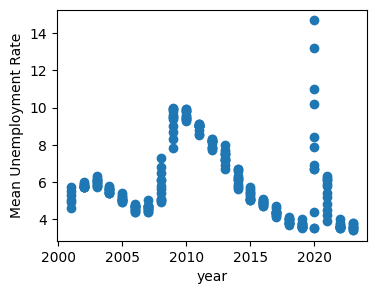

In [30]:
plt.figure(figsize=(4,3))
plt.scatter(join_data_df.year,join_data_df.UNRATE)
plt.xlabel('year')
plt.ylabel('Mean Unemployment Rate')
plt.show()

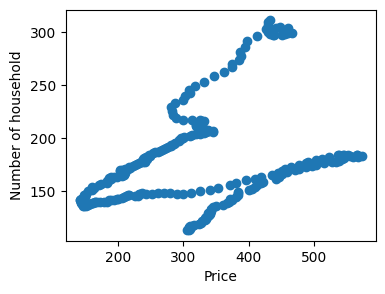

In [54]:
# Price VS Number of houses
plt.figure(figsize=(4,3))
plt.scatter(data_df_new.Num_Households,data_df_new.Price_fact)
plt.xlabel('Price')
plt.ylabel('Number of household')
plt.show()

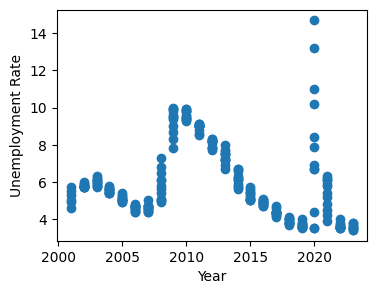

In [55]:
# Year Vs Unemployement in US
plt.figure(figsize=(4,3))
plt.scatter(join_data_df.year,join_data_df.UNRATE)
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.show()

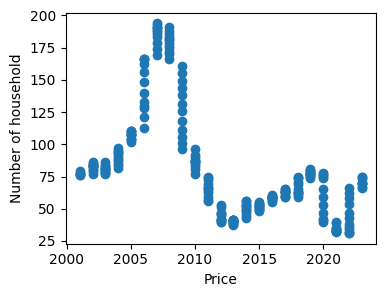

In [56]:
# Year VS Construction completed
plt.figure(figsize=(4,3))
plt.scatter(data_df_new.Year,data_df_new.Const_complt)
plt.xlabel('Price')
plt.ylabel('Number of household')
plt.show()

In [31]:
# Total number of houses for sale
# Link :- https://fred.stlouisfed.org/series/HNFSEPUSSA/
data_new = pd.read_csv("number_of_houses.csv", names = ["DATE", "Num_Households"], skiprows = 1)
# data_new=pd.read_csv('HNFSEPUSSA.csv')  # Total number of houses for sale
data_new.head(12)

,DATE,Num_Households
0,2001-07-01,305.0
1,2001-08-01,308.0
2,2001-09-01,310.0
3,2001-10-01,308.0
4,2001-11-01,308.0
5,2001-12-01,308.0
6,2002-01-01,310.0
7,2002-02-01,313.0
8,2002-03-01,316.0
9,2002-04-01,324.0


In [32]:
data_new['year']=  pd.DatetimeIndex(data_new['DATE']).year 

In [36]:
join_data_df.dtypes

DATE         datetime64[ns]
NHFSEPCS            float64
NHFSEPUCS           float64
NHFSEPNTS           float64
UNRATE              float64
CSUSHPISA           float64
Year                  int32
Month                 int32
year                  int32
dtype: object

In [37]:
data_new.dtypes

DATE               object
Num_Households    float64
year                int32
dtype: object

In [38]:
data_new["DATE"] = pd.to_datetime(data_new["DATE"])

In [39]:
data_new.dtypes
# join_data_df.corr()

DATE              datetime64[ns]
Num_Households           float64
year                       int32
dtype: object

In [40]:
data_df_new=pd.merge(data_new,join_data_df,on='DATE',how ='inner')

In [41]:
data_df_new

,DATE,Num_Households,year_x,NHFSEPCS,NHFSEPUCS,NHFSEPNTS,UNRATE,CSUSHPISA,Year,Month,year_y
0,2001-07-01,305.0,2001,76.0,186.0,43.0,4.6,113.491,2001,7,2001
1,2001-08-01,308.0,2001,77.0,187.0,44.0,4.9,114.167,2001,8,2001
2,2001-09-01,310.0,2001,79.0,191.0,40.0,5.0,114.812,2001,9,2001
3,2001-10-01,308.0,2001,78.0,189.0,41.0,5.3,115.310,2001,10,2001
4,2001-11-01,308.0,2001,77.0,191.0,40.0,5.5,115.857,2001,11,2001
...,...,...,...,...,...,...,...,...,...,...,...
262,2023-05-01,426.0,2023,66.0,268.0,92.0,3.7,302.566,2023,5,2023
263,2023-06-01,429.0,2023,70.0,266.0,93.0,3.6,304.593,2023,6,2023
264,2023-07-01,429.0,2023,73.0,260.0,96.0,3.5,306.767,2023,7,2023
265,2023-08-01,430.0,2023,75.0,258.0,97.0,3.8,309.155,2023,8,2023


In [42]:
data_df_new.rename(columns = {'NHFSEPCS':'Const_complt', 
                              'NHFSEPUCS':'un_constr',
                              'NHFSEPNTS':'Cnstr_not_Strtd',
                               'U2RATE':'Unemploy_Rate',
                              'CSUSHPISA':'Price_fact',
                              'FEDFUNDS':'Interest'}, inplace = True)

In [43]:
data_df_new

,DATE,Num_Households,year_x,Const_complt,un_constr,Cnstr_not_Strtd,UNRATE,Price_fact,Year,Month,year_y
0,2001-07-01,305.0,2001,76.0,186.0,43.0,4.6,113.491,2001,7,2001
1,2001-08-01,308.0,2001,77.0,187.0,44.0,4.9,114.167,2001,8,2001
2,2001-09-01,310.0,2001,79.0,191.0,40.0,5.0,114.812,2001,9,2001
3,2001-10-01,308.0,2001,78.0,189.0,41.0,5.3,115.310,2001,10,2001
4,2001-11-01,308.0,2001,77.0,191.0,40.0,5.5,115.857,2001,11,2001
...,...,...,...,...,...,...,...,...,...,...,...
262,2023-05-01,426.0,2023,66.0,268.0,92.0,3.7,302.566,2023,5,2023
263,2023-06-01,429.0,2023,70.0,266.0,93.0,3.6,304.593,2023,6,2023
264,2023-07-01,429.0,2023,73.0,260.0,96.0,3.5,306.767,2023,7,2023
265,2023-08-01,430.0,2023,75.0,258.0,97.0,3.8,309.155,2023,8,2023


In [44]:
data_df_new=data_df_new.drop(columns=['year_x','year_y'],axis=1)

# data_df_new=data_df_new.drop(columns=['year_x','year_y','Const_complt','un_constr','Cnstr_not_Strtd','Year','Month'],axis=1)
data_df_new

,DATE,Num_Households,Const_complt,un_constr,Cnstr_not_Strtd,UNRATE,Price_fact,Year,Month
0,2001-07-01,305.0,76.0,186.0,43.0,4.6,113.491,2001,7
1,2001-08-01,308.0,77.0,187.0,44.0,4.9,114.167,2001,8
2,2001-09-01,310.0,79.0,191.0,40.0,5.0,114.812,2001,9
3,2001-10-01,308.0,78.0,189.0,41.0,5.3,115.310,2001,10
4,2001-11-01,308.0,77.0,191.0,40.0,5.5,115.857,2001,11
...,...,...,...,...,...,...,...,...,...
262,2023-05-01,426.0,66.0,268.0,92.0,3.7,302.566,2023,5
263,2023-06-01,429.0,70.0,266.0,93.0,3.6,304.593,2023,6
264,2023-07-01,429.0,73.0,260.0,96.0,3.5,306.767,2023,7
265,2023-08-01,430.0,75.0,258.0,97.0,3.8,309.155,2023,8


In [45]:
data_df_mean = data_df_new.groupby(by='Year', as_index=False).mean()  # Mean of the Data and group By year 
data_df_mean

,Year,DATE,Num_Households,Const_complt,un_constr,Cnstr_not_Strtd,UNRATE,Price_fact,Month
0,2001,2001-09-15 20:00:00,307.833333,77.166667,189.000000,41.666667,5.166667,115.015333,9.5
1,2002,2002-06-16 12:00:00,327.500000,82.500000,199.000000,46.000000,5.783333,122.279250,6.5
2,2003,2003-06-16 12:00:00,348.416667,80.833333,213.916667,53.666667,5.991667,133.731333,6.5
3,2004,2004-06-16 08:00:00,395.333333,89.916667,243.250000,62.166667,5.541667,150.440250,6.5
4,2005,2005-06-16 12:00:00,467.666667,106.750000,279.500000,81.416667,5.083333,171.737000,6.5
5,2006,2006-06-16 12:00:00,553.333333,144.083333,318.166667,91.083333,4.608333,183.447500,6.5
6,2007,2007-06-16 12:00:00,531.083333,185.416667,267.166667,78.500000,4.616667,179.918917,6.5
7,2008,2008-06-16 08:00:00,425.500000,179.083333,190.416667,56.000000,5.800000,164.057417,6.5
8,2009,2009-06-16 12:00:00,278.833333,128.000000,115.750000,35.083333,9.283333,148.545083,6.5
9,2010,2010-06-16 12:00:00,211.333333,86.500000,97.083333,27.750000,9.608333,144.674500,6.5


In [46]:
# EDA Using Dtale Librery

In [47]:
import dtale
dtale.show(data_df_new)

In [ ]:
# data_df_new.to_csv("Final_USHousing_DataSet.csv")

In [48]:
import klib

In [49]:
klib.missingval_plot(data_df_new) # returns a figure containing information about missing values

No missing values found in the dataset.


<Axes: xlabel='Num_Households', ylabel='Density'>

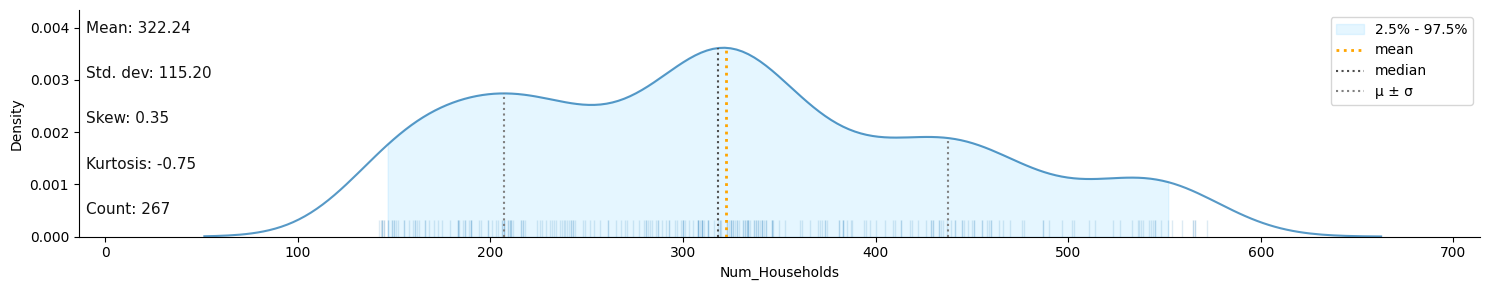

In [50]:
klib.dist_plot(data_df_new) # returns a distribution plot for every numeric feature

<Axes: title={'center': 'Feature-correlation (pearson)'}>

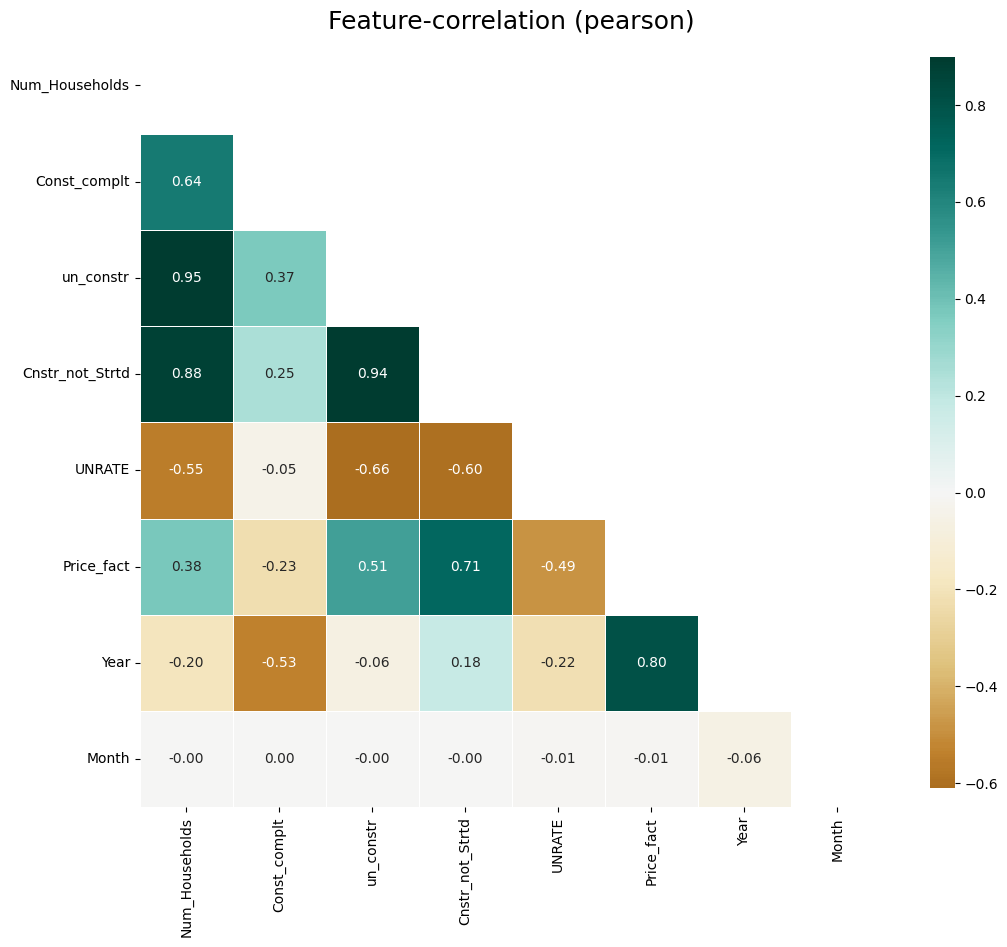

In [51]:
klib.corr_plot(data_df_new)

In [52]:
klib.corr_mat(data_df_new)

,Num_Households,Const_complt,un_constr,Cnstr_not_Strtd,UNRATE,Price_fact,Year,Month
Num_Households,1.00,0.64,0.95,0.88,-0.55,0.38,-0.20,-0.00
Const_complt,0.64,1.00,0.37,0.25,-0.05,-0.23,-0.53,0.00
un_constr,0.95,0.37,1.00,0.94,-0.66,0.51,-0.06,-0.00
Cnstr_not_Strtd,0.88,0.25,0.94,1.00,-0.60,0.71,0.18,-0.00
UNRATE,-0.55,-0.05,-0.66,-0.60,1.00,-0.49,-0.22,-0.01
Price_fact,0.38,-0.23,0.51,0.71,-0.49,1.00,0.80,-0.01
Year,-0.20,-0.53,-0.06,0.18,-0.22,0.80,1.00,-0.06
Month,-0.00,0.00,-0.00,-0.00,-0.01,-0.01,-0.06,1.00


# Exploratory Data Analysis

In [57]:
# !pip install -U notebook-as-pdf
# !pyppeteer-install